# ML Course 7 - Practice on discriminant analysis

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

**Loading the data set from Scikit-Learn**

In [195]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [196]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [197]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [198]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [199]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [200]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [201]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


## Subject

We consider two predictors: mean radius and mean texture.
* Train a k-NN with k=5 and plot the decision areas based on that model
* Optional: explore different values of k to determine an optimal value
* Train a Decision Tree and plot the decision areas based on that model
* Optional: train a Random Forest and plot the decision areas based on that model
* Train a SVM and plot the decision areas based on that model
* Compare the performance between all that models

In [202]:
df1 = pd.concat([features,target], axis=1)

In [203]:
X = features[['mean radius','mean texture']]
y = target[['tumor type']]

In [204]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target['tumor type'])
print(y[:10])

[1 1 1 1 1 1 1 1 1 1]


In [188]:
from sklearn.linear_model import LogisticRegression
log_reg = {'classifier': LogisticRegression()}
# classifier = LogisticRegression(C=0.01, solver='liblinear')
log_reg['classifier'].fit(X_train, y_train)

LogisticRegression()

In [205]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 2) (426,)
Test set: (143, 2) (143,)


In [237]:
from sklearn.neighbors import KNeighborsClassifier
knn = {'classifier': KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)}
knn['classifier'].fit(X_train, y_train)

KNeighborsClassifier()

In [266]:
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1,51,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

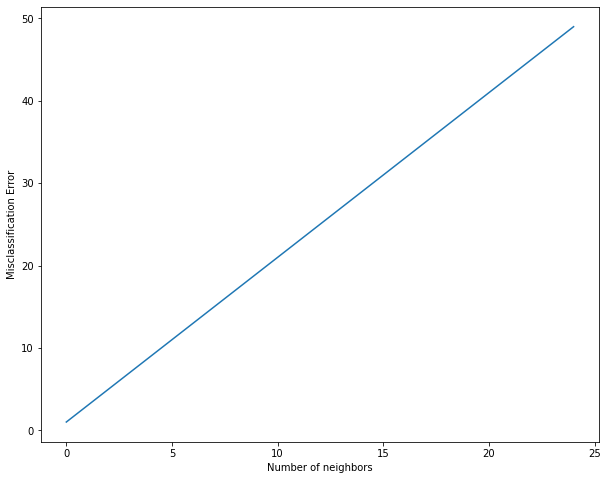

In [267]:
plt.figure(figsize = (10,8))
plt.plot(neighbors)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [270]:
from sklearn.tree import DecisionTreeClassifier
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 5)}
# dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0)}
dt['classifier'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

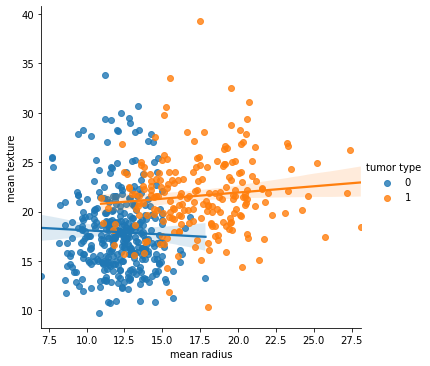

In [271]:
sns.lmplot(x='mean radius', y='mean texture', hue='tumor type', data=df1)

In [272]:
from sklearn.svm import SVC
svm = {'classifier': SVC(kernel = 'linear', random_state = 0, probability = True)}
svm['classifier'].fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [275]:
log_reg['y_pred'] = log_reg['classifier'].predict(X_test)

In [277]:
dt['y_pred'] = dt['classifier'].predict(X_test)
print(np.concatenate((dt['y_pred'].reshape(len(dt['y_pred']),1), y_test.reshape(len(y_test),1)),axis=1)[:2])

[[1 1]
 [1 0]]


In [281]:
svm['y_pred'] = svm['classifier'].predict(X_test)
print(np.concatenate((svm['y_pred'].reshape(len(svm['y_pred']),1), y_test.reshape(len(y_test),1)),axis=1)[:2])

[[0 1]
 [0 0]]


In [282]:
#prediction for knn model

In [283]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy (p) is ' + str(round(accuracy_score(y_test, log_reg['y_pred']),2)))
print('Precision (p) is ' + str(round(precision_score(y_test, log_reg['y_pred']),2)))
print('Recall (p) is ' + str(round(recall_score(y_test, log_reg['y_pred']),2)))

Accuracy (p) is 0.9
Precision (p) is 0.87
Recall (p) is 0.87


In [284]:
#prediction for decisiontree

In [285]:
print('Accuracy (p) is ' + str(round(accuracy_score(y_test, dt['y_pred']),2)))
print('Precision (p) is ' + str(round(precision_score(y_test, dt['y_pred']),2)))
print('Recall (p) is ' + str(round(recall_score(y_test, dt['y_pred']),2)))

Accuracy (p) is 0.89
Precision (p) is 0.85
Recall (p) is 0.85


In [ ]:
#prediction for svm

In [287]:
print('Accuracay is ' + str(round(accuracy_score(y_test, svm['y_pred']),2)))
print('prediction is ' + str(round(precision_score(y_test, svm['y_pred']),2)))
print('Recall  is ' + str(round(recall_score(y_test, svm['y_pred']),2)))

Accuracay is 0.9
prediction is 0.87
Recall  is 0.87
